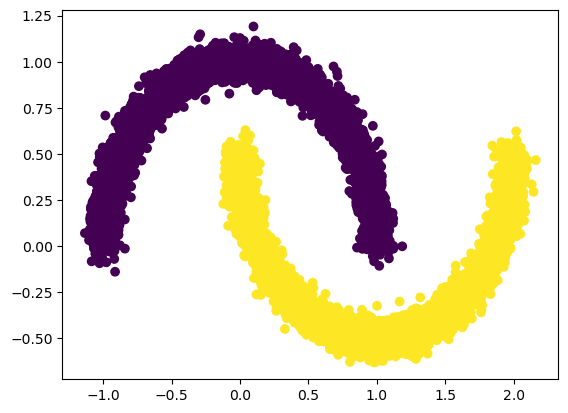

/home/rasoulkhazaei/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


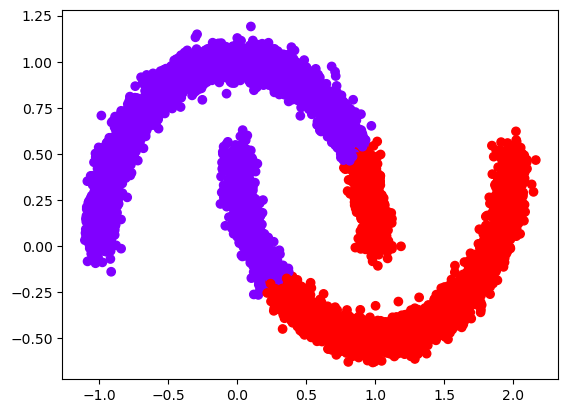

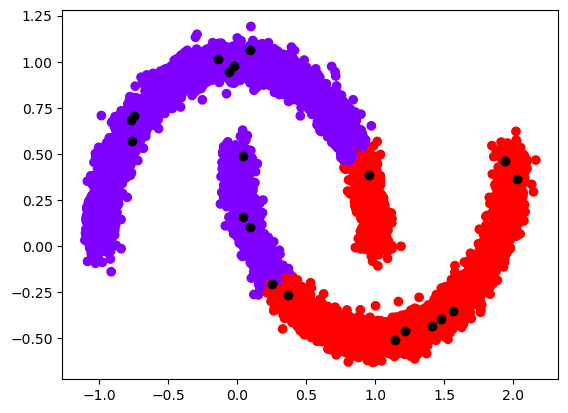

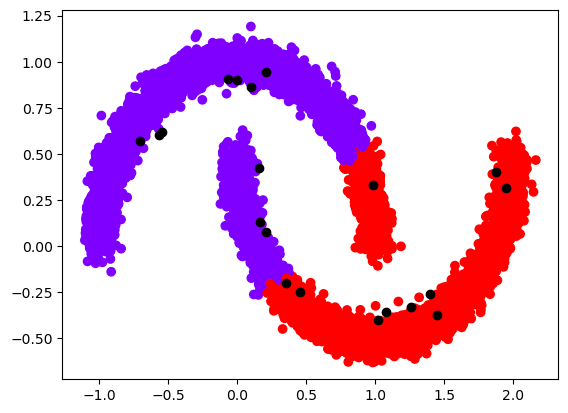

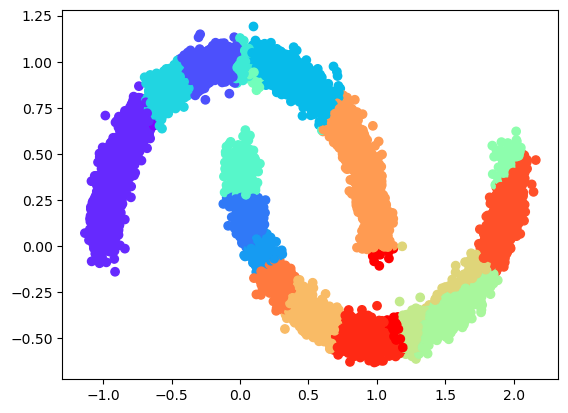

In [9]:
from sklearn.datasets import make_moons

data = make_moons(n_samples=10000, noise=0.05)

# plot the data
import matplotlib.pyplot as plt
plt.scatter(data[0][:,0], data[0][:,1], c=data[1])
plt.show()

# Pick 500 random sample data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[0], data[1], test_size=0.05)

# By using hierarchical clustering find the two clusters of data (CURE Algorithm)
from sklearn.cluster import AgglomerativeClustering
import numpy as np
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X_train)
labels = cluster.labels_
labels = np.unique(labels)

# Plot the clusters of data
plt.scatter(X_train[:,0], X_train[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()


# Now randomly select m point from each cluster we call these point representation points. Plot these points
# and the clusters of data
m = 10
representative_points = []
for label in labels:
    cluster_points = X_train[cluster.labels_ == label]
    representative_points.append(cluster_points[np.random.randint(cluster_points.shape[0], size=m)])
representative_points = np.array(representative_points).reshape(-1, 2)
plt.scatter(X_train[:,0], X_train[:,1], c=cluster.labels_, cmap='rainbow')
plt.scatter(representative_points[:,0], representative_points[:,1], color='black')
plt.show()

# Calculate the center of each cluster based on the representation points and shift each
# representation point 10 percent closer to the center of its corresponding cluster.
center = []
for label in labels:
    cluster_points = X_train[cluster.labels_ == label]
    center.append(cluster_points.mean(axis=0))
center = np.array(center)
for i in range(representative_points.shape[0]):
    label = cluster.labels_[i]
    representative_points[i] = representative_points[i] + 0.1 * (center[label] - representative_points[i])
plt.scatter(X_train[:,0], X_train[:,1], c=cluster.labels_, cmap='rainbow')
plt.scatter(representative_points[:,0], representative_points[:,1], color='black')
plt.show()

# Now for all 10000 data points find which clusters by finding the nearest representation point.
from scipy.spatial import distance
labels = []
for point in data[0]:
    labels.append(np.argmin(distance.cdist(representative_points, [point])))
labels = np.array(labels)
plt.scatter(data[0][:,0], data[0][:,1], c=labels, cmap='rainbow')
plt.show()


In [2]:
from pyclustering.cluster.encoder import type_encoding

ModuleNotFoundError: No module named 'pyclustering'